In [4]:
import pandas as pd

df = pd.read_csv("Housing.csv", sep=",")
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [5]:
X = df.loc[:, ["area", "bedrooms", "bathrooms", "stories", "parking"]]
y = df.loc[:, "price"]
print(X)
print(y)

     area  bedrooms  bathrooms  stories  parking
0    7420         4          2        3        2
1    8960         4          4        4        3
2    9960         3          2        2        2
3    7500         4          2        2        3
4    7420         4          1        2        2
..    ...       ...        ...      ...      ...
540  3000         2          1        1        2
541  2400         3          1        1        0
542  3620         2          1        1        0
543  2910         3          1        1        0
544  3850         3          1        2        0

[545 rows x 5 columns]
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

print(model.coef_)

print(model.rank_)

print(model.singular_)

print(model.intercept_)

print(model.n_features_in_)

print(model.score(X,y))

[3.31115495e+02 1.67809788e+05 1.13374016e+06 5.47939810e+05
 3.77596289e+05]
5
[5.06159523e+04 2.29711586e+01 1.88067029e+01 1.40549153e+01
 1.01386305e+01]
-145734.48945587967
5
0.5615825438679802


Now, instead of using the built-in linear-regression model provided by `scikit-learn`, we will compute the weights explicitly using `numpy`. 

In [ ]:
import numpy as np

N = y.shape

Xmat = np.c_[np.ones(N),np.array(X)]
yvec = np.array(y)

[[1.00e+00 7.42e+03 4.00e+00 2.00e+00 3.00e+00 2.00e+00]
 [1.00e+00 8.96e+03 4.00e+00 4.00e+00 4.00e+00 3.00e+00]
 [1.00e+00 9.96e+03 3.00e+00 2.00e+00 2.00e+00 2.00e+00]
 ...
 [1.00e+00 3.62e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 2.91e+03 3.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 3.85e+03 3.00e+00 1.00e+00 2.00e+00 0.00e+00]]


In [40]:
from numpy.linalg import inv

A = np.transpose(Xmat) @ Xmat

B = inv(A)

C = B @ np.transpose(Xmat)

theta = C @ yvec

print(theta)

[-1.45734489e+05  3.31115495e+02  1.67809788e+05  1.13374016e+06
  5.47939810e+05  3.77596289e+05]


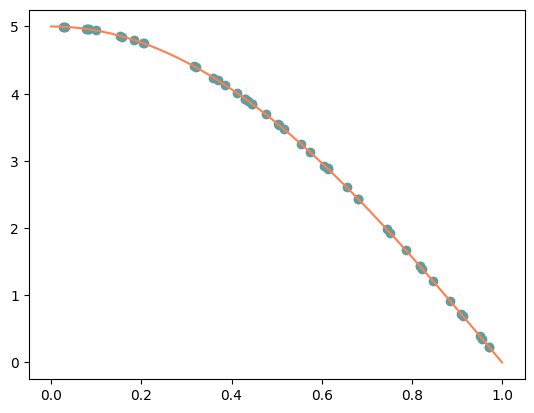

In [164]:
import matplotlib.pyplot as plt

x_range = np.linspace(0,1,1000)

N = 50

x = np.random.rand(N)

mu = 0
sigma = 0.001
noise = np.random.normal(mu,sigma,N)

y = x**4 - 6*x**2 + 5 + noise

plt.scatter(x,y, color = 'cadetblue')
plt.plot(x_range,[x_**4 - 6*x_**2 + 5 for x_ in x_range], color = 'coral')


coefficients:
[ 4.99929177  0.0133274  -6.04746856  0.05769424  0.97696667]


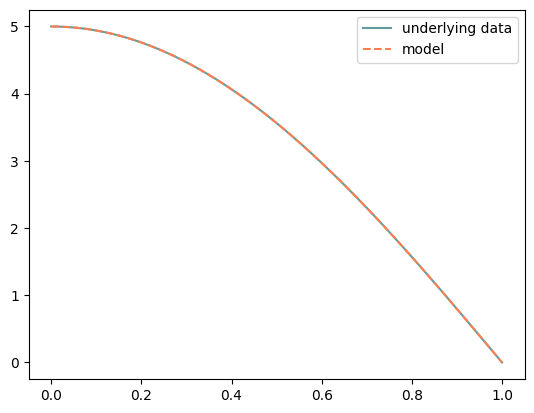

In [165]:
X = np.c_[np.ones(N), x, x**2, x**3, x**4]

model = LinearRegression(fit_intercept=False).fit(X, y)

coeffs = model.coef_

print("coefficients:")
print(coeffs)

plt.plot(x_range,[x_**4 - 6*x_**2 + 5 for x_ in x_range], color = 'cadetblue', label = 'underlying data')
plt.plot(x_range, [coeffs[0] + coeffs[1]*x_ + coeffs[2]*x_**2 + coeffs[3]*x_**3 + coeffs[4]*x_**4 for x_ in x_range], color = 'coral', linestyle = '--', label = 'model')

plt.legend()


coefficients:
[ 4.99929177  0.0133274  -6.04746856  0.05769424  0.97696667]
empirical risk - sklearn:
8.286236545246822e-07
empirical risk - manual:
8.286236545245547e-07


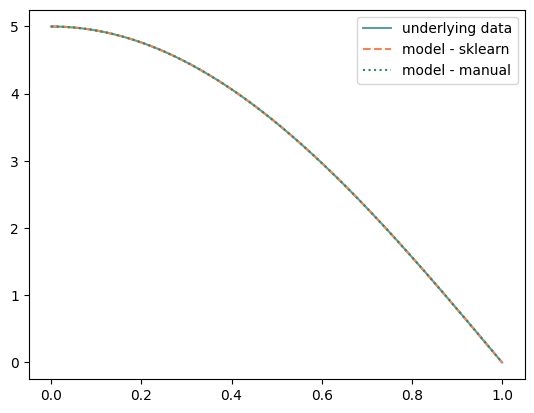

In [166]:
A = np.transpose(X) @ X

B = inv(A)

C = B @ np.transpose(X)

coeffs2 = C @ y

print("coefficients:")
print(coeffs2)

print("empirical risk - sklearn:")
print(sum((y - X @ coeffs)**2)/N)

print("empirical risk - manual:")
print(sum((y - X @ coeffs2)**2)/N)

plt.plot(x_range,[x_**4 - 6*x_**2 + 5 for x_ in x_range], color = 'cadetblue', label = 'underlying data')
plt.plot(x_range, [coeffs[0] + coeffs[1]*x_ + coeffs[2]*x_**2 + coeffs[3]*x_**3 + coeffs[4]*x_**4 for x_ in x_range], color = 'coral', linestyle = '--', label = 'model - sklearn')
plt.plot(x_range, [coeffs2[0] + coeffs2[1]*x_ + coeffs2[2]*x_**2 + coeffs2[3]*x_**3 + coeffs2[4]*x_**4 for x_ in x_range], color = 'seagreen', linestyle = ':', label = 'model - manual')

plt.legend()

In [168]:
from numpy.linalg import qr
from scipy.linalg import solve_triangular

Q, R = qr(X)

Qty = np.transpose(Q) @ y

coeffs3 = solve_triangular(R, Qty)

print("coefficients:")
print(coeffs3)

print("empirical risk - QR:")
print(sum((y - X @ coeffs3)**2)/N)

coefficients:
[ 4.99929177  0.0133274  -6.04746856  0.05769424  0.97696667]
empirical risk - QR:
8.286236545244851e-07


gradient:
1.9990440836350567


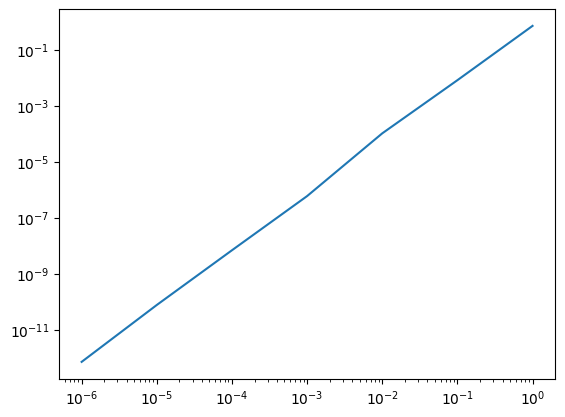

In [154]:
x = np.random.rand(N)

sigma_list = [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]

scores = np.zeros(len(sigma_list))

for i in range(len(sigma_list)):
    mu = 0
    sigma = sigma_list[i]
    noise = np.random.normal(mu,sigma,N)

    y = x**4 - 6*x**2 + 5 + noise

    X = np.c_[np.ones(N), x, x**2, x**3, x**4]

    model = LinearRegression(fit_intercept=False).fit(X, y)

    coeffs = model.coef_

    scores[i] = sum((y - X @ coeffs)**2)/N

plt.loglog(sigma_list,scores)

print("gradient:")
print((np.log(scores[-1])-np.log(scores[0]))/(np.log(sigma_list[-1])-np.log(sigma_list[0])))
    